<a href="https://colab.research.google.com/github/Wen9324/Association-Rules-ShoppingBasketAnalysis/blob/main/%E9%97%9C%E8%81%AF%E8%A6%8F%E5%89%87(%E8%B3%BC%E7%89%A9%E7%B1%83%E5%88%86%E6%9E%90)_Association_Rules_%E6%BA%AB%E9%83%81%E7%B6%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 關聯規則(購物籃分析) Association Rules

資料集(Online Retail Data Set)

https://archive.ics.uci.edu/ml/datasets/online+retail

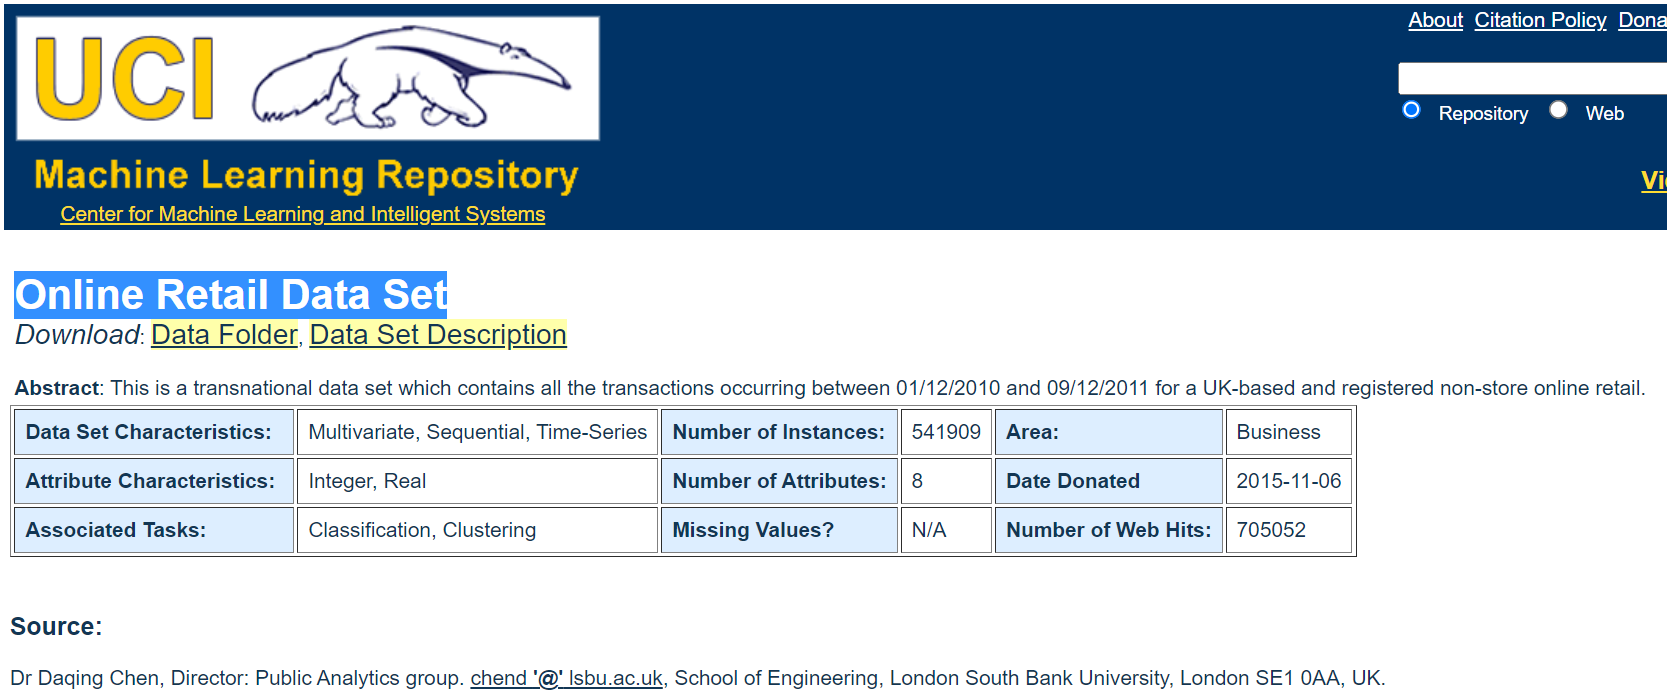

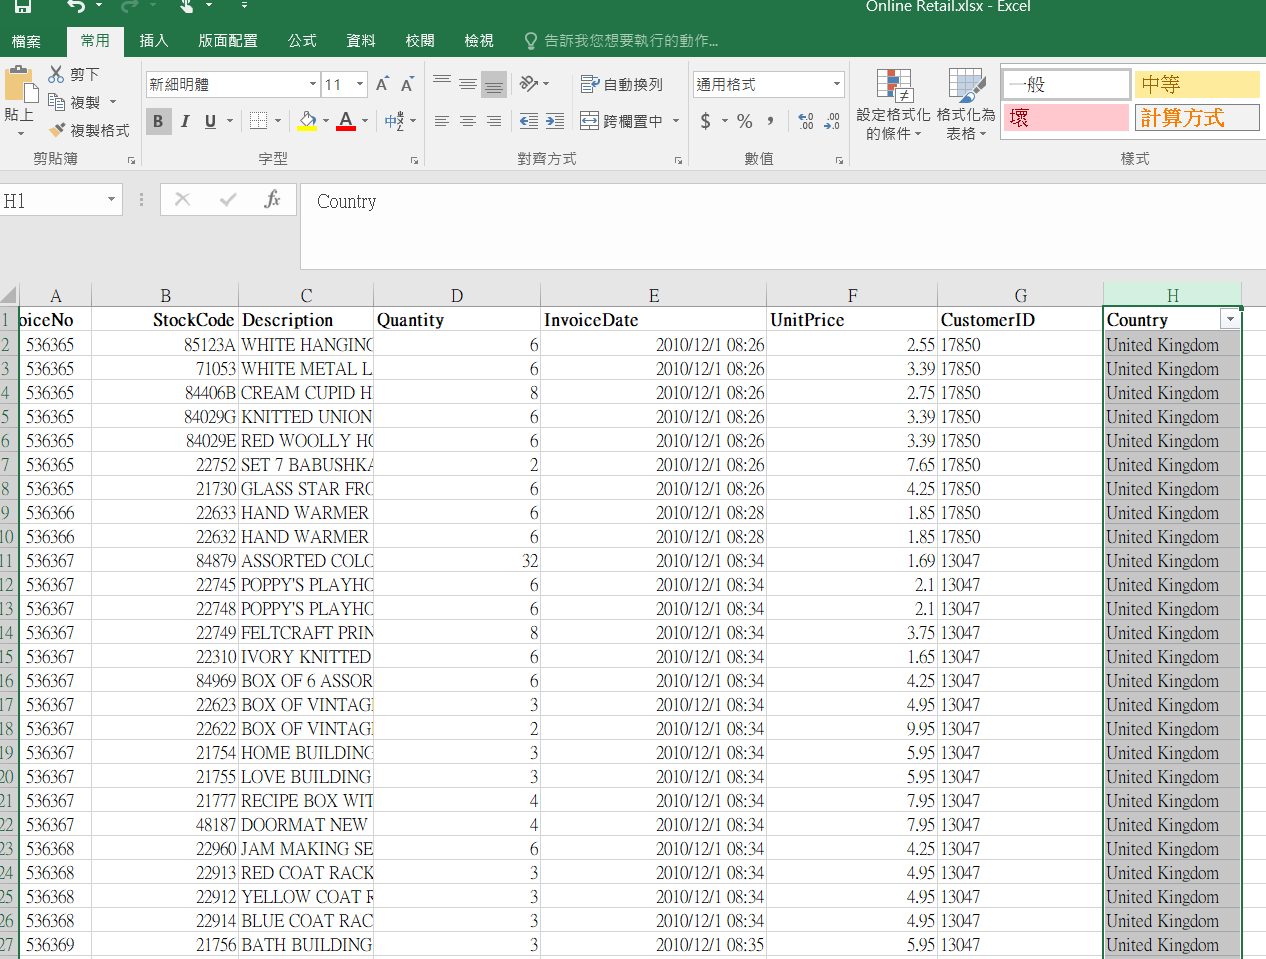

https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

/content/drive/MyDrive/Colab Notebooks/TQC機器學習/Online Retail.xlsx

In [ ]:
#%%
import pandas as pd
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
# df = pd.read_excel('Online Retail.xlsx')
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx') #利用網址連結
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# /content/drive/MyDrive/Colab Notebooks/TQC機器學習/Online Retail.xlsx
dfG = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TQC機器學習/Online Retail.xlsx') #或用雲端連結下載資料
dfG.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#data clean

In [ ]:
#%%
#data clean
df['Description'] = df['Description'].str.strip()
df.dropna(axis = 0, subset=['InvoiceNo'], inplace = True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
# 去除退貨記錄
df = df[~df['InvoiceNo'].str.contains('C')]

#這裡只統計法國資料，依發票及品名小計購買數量

In [ ]:
#%%
#只統計法國資料，依發票及品名小計購買數量
basket_fr = (df[df['Country']=="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_fr.head(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537468,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#購物籃分析不考慮數量，將數量>0的值全部轉為1

In [ ]:
#%%
#購物籃分析不考慮數量，將數量>0的值全部轉為1
def sum_to_boolean(x):
    if x<=0:
        return 0
    else:
        return 1
basket_fr_final = basket_fr.applymap(sum_to_boolean)
basket_fr_final.head(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#篩選Support > 6% 的資料

In [ ]:
#%%
#篩選Support > %6 的資料
frequent_itemsets_fr = apriori(basket_fr_final, min_support = 0.06,
  use_colnames = True)
frequent_itemsets_fr.sort_values('support', ascending = False).head()

,support,itemsets
34,0.765306,(POSTAGE)
35,0.188776,(RABBIT NIGHT LIGHT)
41,0.181122,(RED TOADSTOOL LED NIGHT LIGHT)
32,0.170918,(PLASTERS IN TIN WOODLAND ANIMALS)
29,0.168367,(PLASTERS IN TIN CIRCUS PARADE)


#使用 association rules 找出關聯性，並依照增益排序

In [ ]:
#%%
#使用 association rules 找出關聯性，並依照增益排序
a_rules = association_rules(frequent_itemsets_fr, metric = "lift", min_threshold = 1)
a_rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.068878,0.071429,0.063776,0.925926,12.962963,0.058856,12.535714
14,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.071429,0.068878,0.063776,0.892857,12.962963,0.058856,8.690476
112,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",(ALARM CLOCK BAKELIKE RED),0.073980,0.094388,0.063776,0.862069,9.133271,0.056793,6.565689
113,(ALARM CLOCK BAKELIKE RED),"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",0.094388,0.073980,0.063776,0.675676,9.133271,0.056793,2.855230
126,(ALARM CLOCK BAKELIKE RED),"(POSTAGE, ALARM CLOCK BAKELIKE GREEN)",0.094388,0.084184,0.071429,0.756757,8.989353,0.063483,3.765023
...,...,...,...,...,...,...,...,...,...
45,(MINI PAINT SET VINTAGE),(POSTAGE),0.104592,0.765306,0.081633,0.780488,1.019837,0.001588,1.069161
94,(POSTAGE),(SPACEBOY LUNCH BOX),0.765306,0.125000,0.096939,0.126667,1.013333,0.001276,1.001908
95,(SPACEBOY LUNCH BOX),(POSTAGE),0.125000,0.765306,0.096939,0.775510,1.013333,0.001276,1.045455
37,(LUNCH BAG SPACEBOY DESIGN),(POSTAGE),0.119898,0.765306,0.091837,0.765957,1.000851,0.000078,1.002783


#僅照增益排序，只是代表商品組合性強，不代表關聯的商品是熱銷商品
#例如第一組商品組合(bundle)，在統計期間只賣出27、28個。

In [ ]:
#%%
#僅照增益排序，只是代表商品組合性強，不代表關聯的商品是熱銷商品
#例如第一組商品組合(bundle)，在統計期間只賣出27、28個。
print( basket_fr_final['CHILDRENS CUTLERY SPACEBOY'].sum())
print( basket_fr_final['CHILDRENS CUTLERY DOLLY GIRL'].sum())

27
28


In [ ]:
#%%
a_rules.iloc[50]
print(basket_fr_final['SET/20 RED RETROSPOT PAPER NAPKINS'].sum())

52
